<a href="https://colab.research.google.com/github/keval47/Machine-Learning/blob/master/mnist_classification%20with%2095%25%20accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [0]:
data = datasets.load_digits()

In [0]:
df = pd.DataFrame(data.data)
df['target'] = data.target

In [0]:
X = np.array(df.drop(['target'],axis=1))
Y = np.array(df.target)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10)

In [0]:
class LogisticRegression:
  def __init__(self,epochs=500,lr=0.9):
    self.epochs = epochs
    self.lr = lr
    self.scaler = preprocessing.StandardScaler()
    
  def fit(self,x,y):
    cats = np.unique(y)
    self.scaler.fit(x)
    x = self.__normalize(x)
    x = self.__add_intercept(x)
    self.theta = np.zeros((len(cats),x.shape[1]))
    return self.__gradient_decent(x,y,self.theta,self.lr,self.epochs,cats)
  
  def __add_intercept(self,x):
    ones = np.ones((x.shape[0],1),dtype=int)
    return np.concatenate((ones,x),axis=1)
  
  def __gradient_decent(self,x,y,theta,alpha,epochs,cats):
    m = x.shape[0]
    n = x.shape[1]
    err = []
    for i in range(len(cats)):
      tempErr = np.zeros(epochs)
      newY = np.array(y,copy=True)
      newY[y == i] = 1
      newY[y != i] = 0
      for j in range(epochs):
        theta[i] = self.__gradient_step(x,newY,theta[i],alpha,m)
        tempErr[j] = self.__cost_function(x,newY,theta[i])
      err.append(tempErr)
    return err,theta
  
  def __gradient_step(self,x,y,w,lr,m):
    h = self.__sigmoid(np.dot(x,w))
    pred = h - y
    deriv = np.sum((pred[:,None]*x),axis=0)
    w -= (lr*(1/m))*deriv
    return w
  
  def __sigmoid(self,z):
    return 1/(1+np.exp(-z))
  
  def __cost_function(self,x,y,w):
    h = self.__sigmoid(np.dot(x,w))
    h = np.sum( (y*np.log(h)) + ((1-y)*np.log(1-h)) )
    return -(h / len(y))
  
  def __normalize(self,x):
    return self.scaler.transform(x)
  
  def predict(self,x):
    w = self.theta
    predBit = np.zeros(len(x),dtype=int)
    predPr = np.zeros((len(x),len(w)))
    for i in range(len(x)):
      bit = x[i]
      bit = self.scaler.transform([bit])
      bit = np.insert(bit,0,1)
      for j in range(len(w)):
        p = self.__sigmoid(np.sum(bit*w[j]))
        predPr[i][j] = round(p, 2)*100
      predBit[i] = predPr[i].argmax()
    return predBit,predPr

In [0]:
lr = LogisticRegression()

In [0]:
err,theta = lr.fit(X_train,y_train)

In [0]:
predBit , predPr = lr.predict(X_test)

In [309]:
acc = metrics.accuracy_score(y_test,predBit)
print(acc)

0.95


In [311]:
lr.predict([X_test[56]])

(array([9]), array([[ 0.,  0.,  0.,  5.,  0.,  0.,  1.,  0., 13., 20.]]))

In [313]:
y_test[56]

8

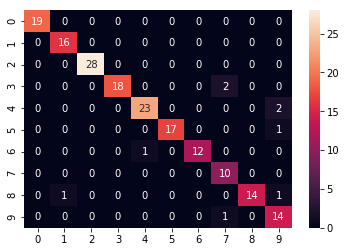

In [315]:
sb.heatmap(metrics.confusion_matrix(y_test,predBit),annot=True)